<a href="https://colab.research.google.com/github/TshepoMaila/365datascience/blob/master/Essay_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA PRE-PROCESSING**

# **Importing packages**

In [1]:
import tarfile
import os
import pandas as pd
import librosa
import glob
from pathlib import Path
import numpy as np
from IPython.display import Audio
from google.colab import drive
from keras.utils import np_utils
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa
import librosa.display
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import time
import PIL

In [2]:
drive.mount('/content/drive')
current = os.getcwd()

Mounted at /content/drive


In [3]:
os.chdir(current)

In [ ]:
!mkdir Train
!mkdir Test

In [4]:
path = os.path.join(current, 'drive', 'My Drive', 'BirdsMsc')   # Change according to your path
os.chdir(path)

with tarfile.open('Test.tar.gz', 'r:gz') as tar:
    tar.extractall(path=os.path.join(current, 'Train'))
with tarfile.open('Train.tar.gz', 'r:gz') as tar:
    tar.extractall(path=os.path.join(current, 'Test'))
with tarfile.open('warblrb10k_subset_metadata.csv.tar.gz', 'r:gz') as tar:
    tar.extractall(path=os.path.join(current))
os.chdir(current)

# **reading metadata csv file**

In [ ]:
labels_df = pd.read_csv('warblrb10k_subset_metadata.csv', sep=',')

Geting the list of names of all files in a directory

In [ ]:
training_files = glob.glob(os.path.join(current,'Train','*.wav'))
training_files = np.asarray(training_files)

Geting the label for a given file

In [ ]:
labels_df.loc[labels_df['itemid'] == Path(training_files[4]).resolve().stem]['hasbird'].values[0]

1

In [ ]:
sr= 11025 #sample rate

In [ ]:
train_directory = os.path.join(current, 'drive', 'My Drive', 'BirdsMsc', 'Train')
librosa_audio, librosa_sample_rate = librosa.load(training_files[4],sr=sr)


# **Cheking the number of bird calls and no bird calls classes in the Data**

In [ ]:
No_bird_calls=[]
bird_calls=[]
l=len(training_files)
for _ in range(l):
  pp=labels_df.loc[labels_df['itemid'] == Path(training_files[_]).resolve().stem]['hasbird'].values[0]
  if pp == 1:
    bird_calls.append(pp)
  else:
    No_bird_calls.append(pp)

Number of no bird calls

In [ ]:
len(No_bird_calls)

230

Number of bird calls

In [ ]:
len(bird_calls)

770

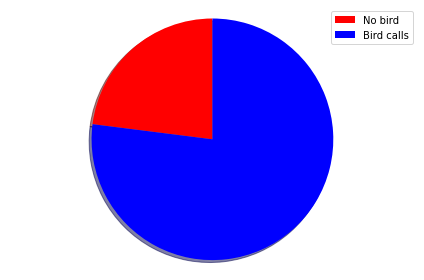

In [ ]:
labels = ['No bird', 'Bird calls']
sizes = [230,770]
colors = ['red', 'blue']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

# **Cheking the duration of the audio files**

In [ ]:
duration = []
L= len(training_files)
for _ in range(L):
  librosa_audio, librosa_sample_rate = librosa.load(training_files[_])
  d = len(librosa_audio)/librosa_sample_rate
  duration.append(d)

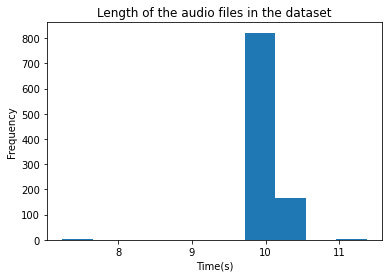

In [ ]:
plt.hist(duration, bins=10)
plt.title('Length of the audio files in the dataset')
plt.ylabel('Frequency')
plt.xlabel('Time(s)');

# **Making the audios to have the same length**

## Extracting the no bird calls and bird calls in the data

In [ ]:
No_birdsounds= []
Bird_Calls = []
for i in range(len(training_files)):
  if labels_df['hasbird'][i] == 0:
    No_birdsounds.append(training_files[i])
  else:
    Bird_Calls.append(training_files[i])

In [ ]:
len(No_birdsounds)

227

In [ ]:
len(Bird_Calls)

773

### Cutting the bird calls audio to start from 1s to 9s

In [ ]:
New_birdcalls_audiolengths=[]
for _ in Bird_Calls:
  audio, sample_rate = librosa.load(_)
  if len(audio)>= sample_rate*9:
    audio_cutted = audio[sample_rate*1:sample_rate*9]
    New_birdcalls_audiolengths.append(audio_cutted)

In [ ]:
len(New_birdcalls_audiolengths)

768

Cutting the no bird calls audio to start from 1s to 9s

In [ ]:
%%time
New_nobirdcalls_audiolengths=[]
for _ in No_birdsounds:
  audio, sample_rate = librosa.load(_)
  if len(audio)>= sample_rate*9:
    audio_cutted = audio[sample_rate*1:sample_rate*9]
    New_nobirdcalls_audiolengths.append(audio_cutted)

CPU times: user 1min 40s, sys: 18 s, total: 1min 58s
Wall time: 2min 37s


In [ ]:
len(New_nobirdcalls_audiolengths)


227

# **Balancing the number of classes in the data**

In [ ]:
t = New_birdcalls_audiolengths[4]

## Example of audio augmentation using time shift

original audio

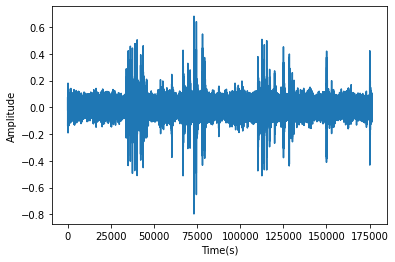

In [ ]:
fig,ax = plt.subplots()
ax.plot(t)
ax.set(xlabel='Time(s)',ylabel = 'Amplitude')
ipd.Audio(t, rate=16000)

## Mel spectogram before augmentation

/usr/local/lib/python3.6/dist-packages/librosa/filters.py:284: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


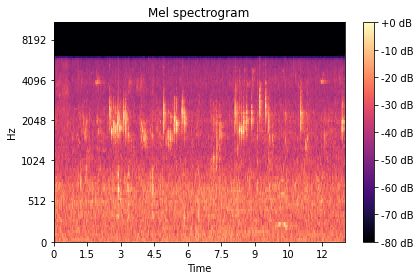

In [ ]:
Original_data = librosa.feature.melspectrogram(t, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, fmin = f_min, fmax=f_max, sr= sr)
librosa.display.specshow(librosa.power_to_db(Original_data, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

Augmented audio

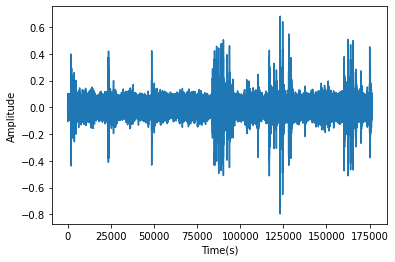

In [ ]:

data_roll = np.roll(t, 50000)
fig,ax = plt.subplots()
ax.plot(data_roll)
ax.set(xlabel='Time(s)',ylabel = 'Amplitude')
ipd.Audio(data_roll, rate=16000)

## Mel spectogram after augmentation

/usr/local/lib/python3.6/dist-packages/librosa/filters.py:284: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


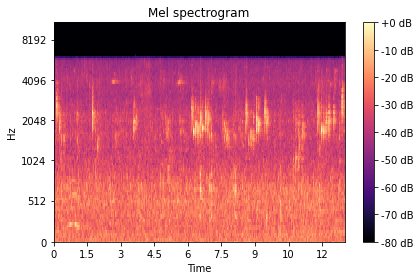

In [ ]:
Augmented = librosa.feature.melspectrogram(data_roll, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, fmin = f_min, fmax=f_max, sr= sr)
librosa.display.specshow(librosa.power_to_db(Augmented, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

# **Audio augmentation of the no bird calls class using time shift**

In [ ]:
Augmented_data = []
for _ in range(len(New_nobirdcalls_audiolengths)):
  data = np.roll(New_nobirdcalls_audiolengths[_], 50000)
  Augmented_data.append(data)

In [ ]:
Augmented_data1 = []
for _ in range(len(New_nobirdcalls_audiolengths)):
  data1 = np.roll(New_nobirdcalls_audiolengths[_], 70000)
  Augmented_data1.append(data1)

In [ ]:
Augmented_data2 = []
for _ in range(len(New_nobirdcalls_audiolengths[0:87])):
  data2 = np.roll(New_nobirdcalls_audiolengths[_], 100000)
  Augmented_data2.append(data2)

## Converting the  list into numpy arrays and concatenate the arrays

In [ ]:
nobird = [*Augmented_data, *Augmented_data1,*Augmented_data2,*New_nobirdcalls_audiolengths]

In [ ]:
len(nobird)

768

In [ ]:
nobird = np.asarray(nobird)

In [ ]:
nobird.shape

In [ ]:
len(New_birdcalls_audiolengths)

768

In [ ]:
New_birdcalls_audiolengths = np.asarray(New_birdcalls_audiolengths)

In [ ]:
New_birdcalls_audiolengths.shape

(768, 176400)

concatenate the arrays

In [ ]:
X_audio = np.concatenate((New_birdcalls_audiolengths,nobird))


In [ ]:
X_audio.shape

(1536, 176400)

## creating the labels

In [ ]:
New_birdcalls_labels=np.ones((768),dtype=int)
nobird_labels = np.zeros((768),dtype=int)

In [ ]:
Y_labels = np.concatenate((New_birdcalls_labels,nobird_labels),axis=0)

In [ ]:
Y_labels.shape

(1536,)

# **Spectrogram for X_audio and Y_labels**

In [ ]:
X_audio.shape

(1536, 176400)

In [ ]:
n_fft = 1025 # This is a hyper-parameter that you must tweak! You can read papers and experiment to find good values.
hop_length = 315 # This is a hyper-parameter that you must tweak! You can read papers and experiment to find good values.
n_mels = 100# This is a hyper-parameter that you must tweak! You can read papers and experiment to find good values.
f_min = 90 #This is a hyper-parameter that you must tweak! You can read papers and experiment to find good values. Do you need the full frequency range?
f_max = 9600 #This is a hyper-parameter that you must tweak! You can read papers and experiment to find good values. Do you need the full frequency range?

X_spectrogram= librosa.feature.melspectrogram(librosa_audio, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, fmin = f_min, fmax=f_max, sr= sr)


/usr/local/lib/python3.6/dist-packages/librosa/filters.py:284: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


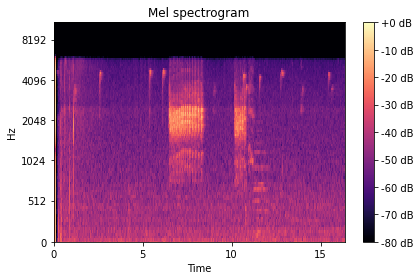

In [ ]:
librosa.display.specshow(librosa.power_to_db(X_spectrogram, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [ ]:
ipd.Audio(X_audio[1], rate=16000)

# **Generating spectograms for all the audio files and reshaping them**

In [ ]:
X_spectrogram.shape[1]

704

In [ ]:
X_spectrogram.shape[0]

100

In [ ]:
%%time
X_features = []
for _ in range(len(X_audio)):
  X_spectrogram = librosa.feature.melspectrogram(X_audio[_], n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, fmin = f_min, fmax=f_max, sr= sr)
  X_reshape= np.reshape(X_spectrogram,(X_spectrogram.shape[0],X_spectrogram.shape[1]))
  X_features.append(X_reshape)


/usr/local/lib/python3.6/dist-packages/librosa/filters.py:284: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


CPU times: user 1min 8s, sys: 50.9 s, total: 1min 59s
Wall time: 1min 1s


In [ ]:
X_features = np.asarray(X_features)

In [ ]:
X_features.shape

(1536, 100, 560)

# **Saving my features and labels into google drive using pickle**

In [ ]:
import pickle

In [ ]:
drive.mount('/content/drive')
current = os.getcwd()

Mounted at /content/drive


In [ ]:
os.chdir(current)
p ='/content/drive/My Drive/Saved_input'

Saving the features and labels

In [ ]:

with open(p+'/X_features.pkl','wb') as f:
  pickle.dump(X_features,f)

with open(p+'/Y_labels.pkl','wb') as f:
  pickle.dump(Y_labels,f)

opening the features and labels

In [ ]:
 file1= open(p+'/X_features.pkl','rb')
 file2= open(p+'/Y_labels.pkl','rb')
 X_features = pickle.load(file1)
 Y_labels = pickle.load(file2)


In [ ]:
X_features.shape

(1536, 100, 560)

In [ ]:
type(X_features)

numpy.ndarray

# **Spliting the data into training and testing**

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(X_features,Y_labels,test_size = 0.2,shuffle = True)


In [ ]:

xTrain.shape[0]

1228

In [ ]:
xTest.shape

(308, 100, 560)

In [ ]:
yTrain.shape

(1228,)

In [ ]:
yTest.shape

(308,)

**Changing the testing and training data into float**

In [ ]:
xTrain = xTrain.reshape(xTrain.shape[0], 100, 560, 1).astype('float32')


In [ ]:
xTrain.shape

(1228, 100, 560, 1)

##**Displaying the training data**

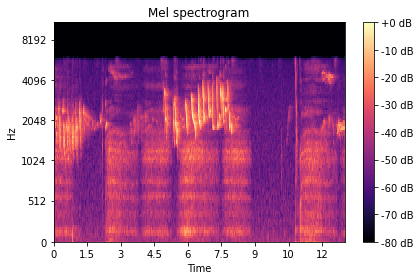

In [ ]:
librosa.display.specshow(librosa.power_to_db(xTrain[7], ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

# **Generate Synthetic audio with DCGANs in Keras**










In [ ]:
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tqdm import tqdm


## Creating Batches of Training Data

In [ ]:
# Batch and shuffle the data
BATCH_SIZE = 32
BUFFER_SIZE = 1000
train_dataset = tf.data.Dataset.from_tensor_slices(xTrain).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# Building the Generator Network for DCGAN

In [ ]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(25* 140 * 256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((25, 140, 256)))
    assert model.output_shape == (None, 25, 140, 256) # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 25, 140, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 50, 280, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 100, 560, 1)

    return model

**Summary of the generator model**

**Creating random noise**

In [ ]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)



In [ ]:
x = np.asarray(generated_image[0]); x = np.reshape(x,(x.shape[0],x.shape[1])); x.shape

(100, 560)

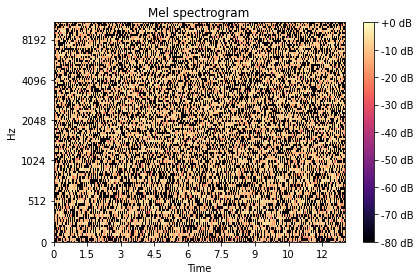

In [ ]:
librosa.display.specshow(librosa.power_to_db(x, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()


In [ ]:
generated_images.shape

##  Building the Discriminator Network for DCGAN

In [ ]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[100, 560, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1,activation='sigmoid'))

    return model

**Summary of the discriminator model**

In [ ]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[0.50006515]], shape=(1, 1), dtype=float32)


## Define the loss and optimizers

In [ ]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# **Discriminator loss**
This method quantifies how well the discriminator is able to distinguish real images from fakes. It compares the discriminator's predictions on real images to an array of 1s, and the discriminator's predictions on fake (generated) images to an array of 0s.

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

# **Generator loss**
The generator's loss quantifies how well it was able to trick the discriminator. Intuitively, if the generator is performing well, the discriminator will classify the fake images as real (or 1). Here, we will compare the discriminators decisions on the generated images to an array of 1s.

In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

The discriminator and the generator optimizers are different since we will train two networks separately.

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

### Save checkpoints
This notebook also demonstrates how to save and restore models, which can be helpful in case a long running training task is interrupted.

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

## Define the training loop

In [ ]:
EPOCHS = 100
noise_dim = 100
num_examples_to_generate = 2

# We will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [ ]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))



    return gen_loss,disc_loss

##Training Procedure

In [ ]:
def train(dataset, epochs):
  gen_losses = []
  disc_losses = []
  predictions = []
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
        gen_loss , disc_loss = train_step(image_batch)
        gen_losses.append(gen_loss)
        disc_losses.append(disc_loss)
    # Produce images for the GIF as we go

    # display.clear_output(wait=True)
    prec = generate_and_save_images(generator,
                             epoch + 1,
                             seed)
    predictions.append(prec)


    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print('Generate Loss {gen_loss} Discriminator loss {disc_loss}  Time for epoch {epoch} is {time} sec'.format(gen_loss=gen_loss, disc_loss=disc_loss,epoch=epoch + 1,time= time.time()-start) )

  # Generate after the final epoch
  # display.clear_output(wait=True)
  final_prec = generate_and_save_images(generator,
                           epochs,
                           seed)
  predictions.append(final_prec)
  return gen_losses,disc_losses,predictions

**Generate and save images**

In [ ]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` iprint(' after  gradients_of_discriminator ')s set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(9,14))

  for i in range(predictions.shape[0]):
      # plt.subplot(2, 2, i+1)
     # plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5)
      #plt.axis('off')
      plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  # plt.show()
  return predictions

## Training DCGAN

In [ ]:
%%time
gen_losses, disc_losses , predictions = train(train_dataset,EPOCHS)

Generate Loss 0.693117618560791 Discriminator loss 1.0776182413101196  Time for epoch 1 is 13.317505598068237 sec
Generate Loss 0.6931424140930176 Discriminator loss 1.100760817527771  Time for epoch 2 is 10.495956659317017 sec
Generate Loss 0.689872682094574 Discriminator loss 1.0455541610717773  Time for epoch 3 is 10.477834463119507 sec
Generate Loss 0.6931467652320862 Discriminator loss 1.025578498840332  Time for epoch 4 is 10.59544849395752 sec
Generate Loss 0.6931172609329224 Discriminator loss 1.0104422569274902  Time for epoch 5 is 10.687177419662476 sec
Generate Loss 0.6931385397911072 Discriminator loss 1.0067414045333862  Time for epoch 6 is 10.597295761108398 sec
Generate Loss 0.6925138235092163 Discriminator loss 1.0096226930618286  Time for epoch 7 is 10.63849401473999 sec
Generate Loss 0.6911267042160034 Discriminator loss 1.0098282098770142  Time for epoch 8 is 10.675068378448486 sec
Generate Loss 0.6769546270370483 Discriminator loss 1.0539829730987549  Time for epoch

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


Generate Loss 0.6888538599014282 Discriminator loss 1.011102557182312  Time for epoch 21 is 11.095536947250366 sec
Generate Loss 0.6866720914840698 Discriminator loss 1.0136699676513672  Time for epoch 22 is 10.965049028396606 sec
Generate Loss 0.6931425929069519 Discriminator loss 1.0148143768310547  Time for epoch 23 is 11.001631259918213 sec
Generate Loss 0.6931447386741638 Discriminator loss 1.033022403717041  Time for epoch 24 is 11.009117603302002 sec
Generate Loss 0.6930167078971863 Discriminator loss 1.0078922510147095  Time for epoch 25 is 10.986652851104736 sec
Generate Loss 0.6930854320526123 Discriminator loss 1.0219099521636963  Time for epoch 26 is 11.02953314781189 sec
Generate Loss 0.6514204740524292 Discriminator loss 1.0691540241241455  Time for epoch 27 is 11.062567472457886 sec
Generate Loss 0.6820555925369263 Discriminator loss 1.0229929685592651  Time for epoch 28 is 11.066494941711426 sec
Generate Loss 0.6885149478912354 Discriminator loss 1.0193442106246948  Tim

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

<Figure size 648x1008 with 0 Axes>

# Loss functions

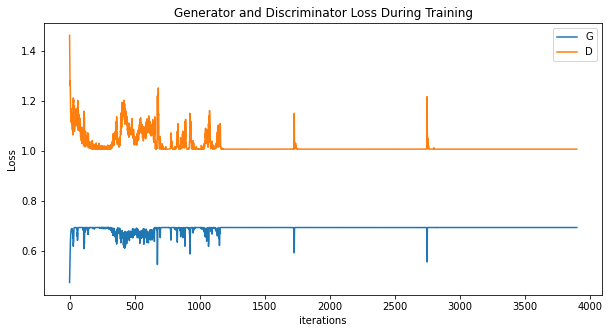

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(gen_losses,label="G")
plt.plot(disc_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

## **Displaying generated audio**

In [ ]:
y = np.asarray(predictions[20][0]); y = np.reshape(y,(y.shape[0],y.shape[1])); y.shape

(100, 560)

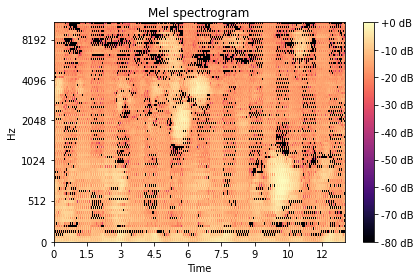

In [ ]:
librosa.display.specshow(librosa.power_to_db(y, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

# **Saving the model and weights**

In [ ]:
from keras.models import model_from_json

# Saving the GAN

In [ ]:
model_path= '/content/drive/My Drive/DC_model'

In [ ]:
# serialize DC GAN model to JSON
model_json = DCGAN.to_json()
with open(model_path+"/DCGAN.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5

DCGAN.save_weights(model_path+"/DCGAN.h5")
print("Saved model to Google Drive")

## **loading the DC GAN model and weights**

In [ ]:
# load json and create model
json_file = open(model_path+'/DCGAN.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(model_path+"DCGAN.h5")
print("Loaded model from Google Drive")

##**Saving the generator model and weights**

In [ ]:
# serialize DC GAN model to JSON
model_json = DCGAN.to_json()
with open(model_path+"/generator.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
DCGAN.save_weights(model_path+"/generator.h5")
print("Saved generator model to Google Drive")

##**loading the generator model and weights**

In [ ]:
# load json and create model
json_file = open(model_path+'/generator.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(model_path+"/generator.h5")
print("Loaded model from Google Drive")

##**Saving the discriminator model and weights**

In [ ]:
# serialize DC GAN model to JSON
model_json = DCGAN.to_json()
with open(model_path+"/discriminator.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
DCGAN.save_weights(model_path+"/discriminator.h5")
print("Saved discriminator model to Google Drive")

##**loading the generator model and weights**

In [ ]:
# load json and create model
json_file = open(model_path+'/discriminator.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(model_path+"/discriminator.h5")
print("Loaded model from Google Drive")